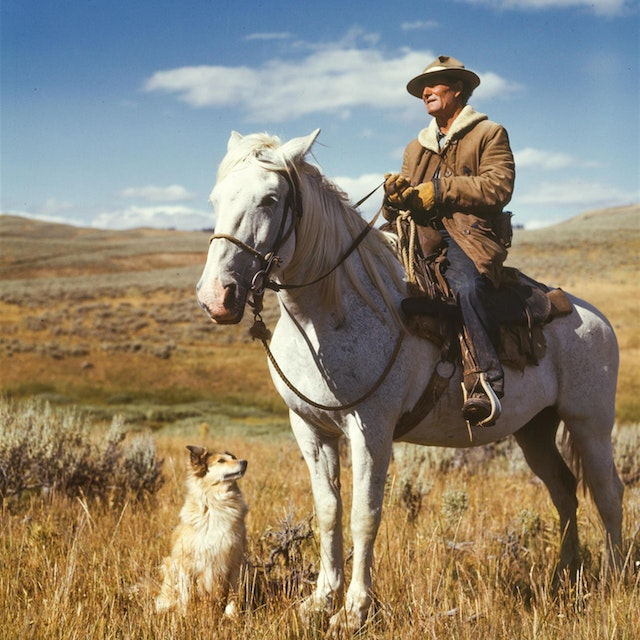

In [ ]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import tensorflow as tf
import tensorflow_hub as hub

img = cv2.imread("horse.jpg")
img= cv2.resize(img, dsize=(640, 640))
cv2_imshow(img)

In [ ]:
img.shape

(640, 640, 3)

In [ ]:
img = np.expand_dims(img, 0)
img.shape

(1, 640, 640, 3)

# SSD

In [ ]:
hub_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1"
object_detector = hub.KerasLayer(hub_url)

In [ ]:
def create_model():
    img_input = tf.keras.Input(shape=(None, None, 3), dtype=tf.uint8)
    outputs = object_detector(img_input)
    model = tf.keras.Model(inputs=img_input, outputs=outputs)
    return model

In [ ]:
model = create_model()

In [ ]:
import time

start_time = time.time()
detector_output = model.predict(img)

print("Time required to predict: {0} seconds.".format(time.time() - start_time))

1/1 [==============================] - 3s 3s/step
Time required to predict: 3.5359115600585938 seconds.


In [ ]:
list(detector_output.keys())

['detection_boxes',
 'detection_multiclass_scores',
 'num_detections',
 'raw_detection_boxes',
 'detection_anchor_indices',
 'raw_detection_scores',
 'detection_scores',
 'detection_classes']

In [ ]:
!wget -qq https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_complete_label_map.pbtxt

In [ ]:
def get_labels(file):
    labels = list()
    with open(file, "r") as file:
        for line in file:
            if "display_name" in line:
                #print(line)
                labels.append(line.split("\"")[1])
    return labels

LABELS = get_labels("mscoco_complete_label_map.pbtxt")

In [ ]:
BB_COLORS = np.random.randint(0, 255, size=(len(LABELS), 3))

In [ ]:
def draw_bounding_boxes(img, output, colors, labels):
    bounding_boxes = output["detection_boxes"][0].shape[0]
    (H, W) = img.shape[1], img.shape[2]
    for i in range(bounding_boxes):
        confidence = output["detection_scores"][0][i]#.numpy()
        if confidence > 0.5:
            ymin, xmin, ymax, xmax = output["detection_boxes"][0][i]#.numpy()
            class_id = int(output["detection_classes"][0][i])

            color = [int(c) for c in colors[class_id]]
            cv2.rectangle(img[0], (round(xmin*W), round(ymin*H)), (round(xmax*W), round(ymax*H)), color, 2)

            text = "{0}: {1:.4f}".format(labels[class_id], confidence)
            cv2.putText(img[0], text, (round(xmin*W), round(ymin*H) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return img

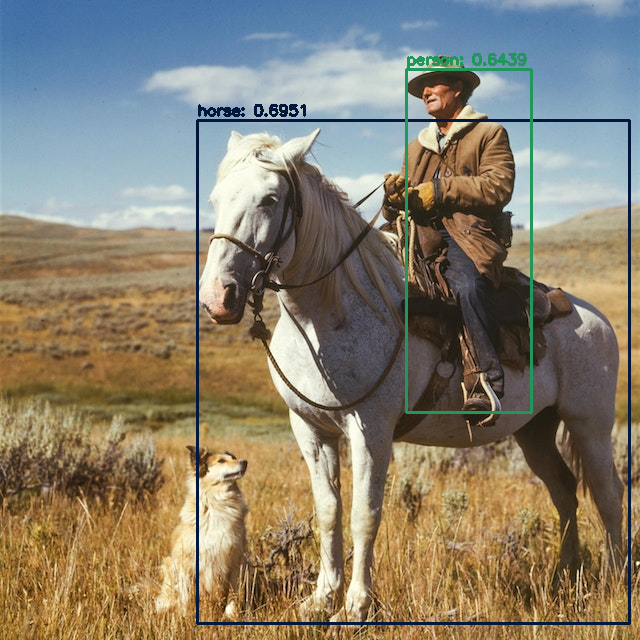

In [ ]:
output_img = draw_bounding_boxes(img, detector_output, BB_COLORS, LABELS)
cv2_imshow(output_img[0])

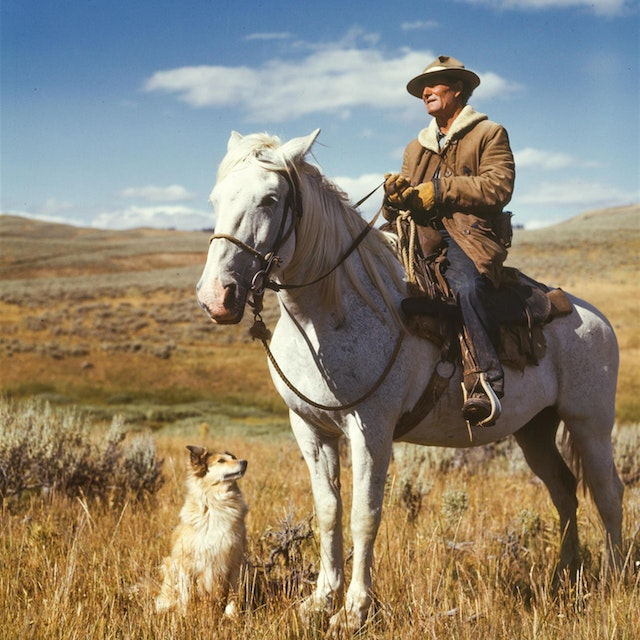

In [ ]:
img = cv2.imread("horse.jpg")
img= cv2.resize(img, dsize=(640, 640))
cv2_imshow(img)
img = np.expand_dims(img, 0)

In [ ]:
hub_url = "https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_640x640/1"
object_detector = hub.KerasLayer(hub_url)

model = create_model()

In [ ]:
start_time = time.time()
detector_output = model.predict(img)

print("Time required to predict: {0} seconds.".format(time.time() - start_time))

1/1 [==============================] - 5s 5s/step
Time required to predict: 4.8069047927856445 seconds.


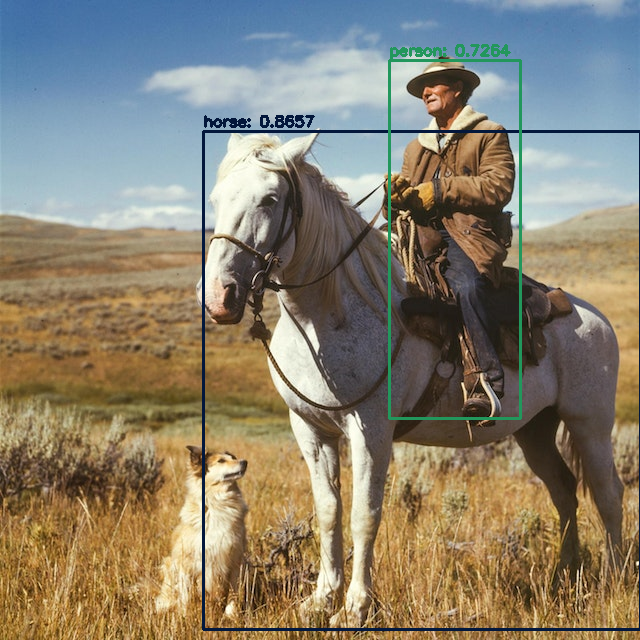

In [ ]:
output_img = draw_bounding_boxes(img, detector_output, BB_COLORS, LABELS)
cv2_imshow(output_img[0])

# RCNN

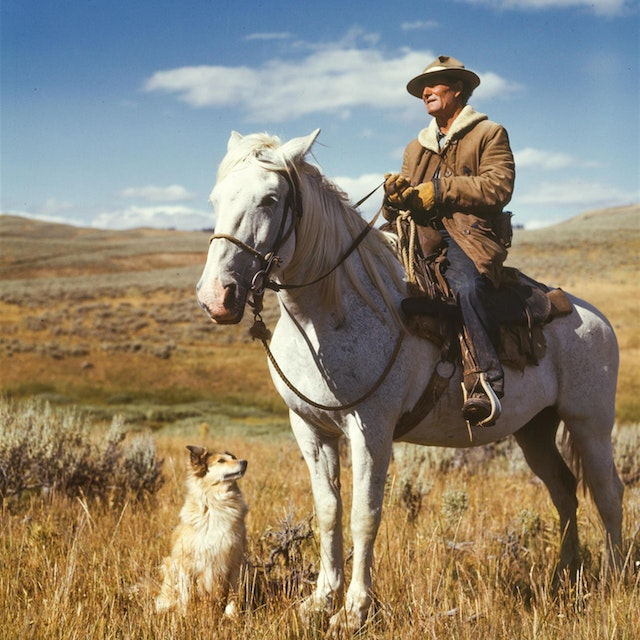

In [ ]:
img = cv2.imread("horse.jpg")
img= cv2.resize(img, dsize=(640, 640))
cv2_imshow(img)
img = np.expand_dims(img, 0)

In [ ]:
hub_url = "https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1"
object_detector = hub.KerasLayer(hub_url)

model = create_model()

In [ ]:
start_time = time.time()
detector_output = model.predict(img)

print("Time required to predict: {0} seconds.".format(time.time() - start_time))

1/1 [==============================] - 4s 4s/step
Time required to predict: 4.347385406494141 seconds.


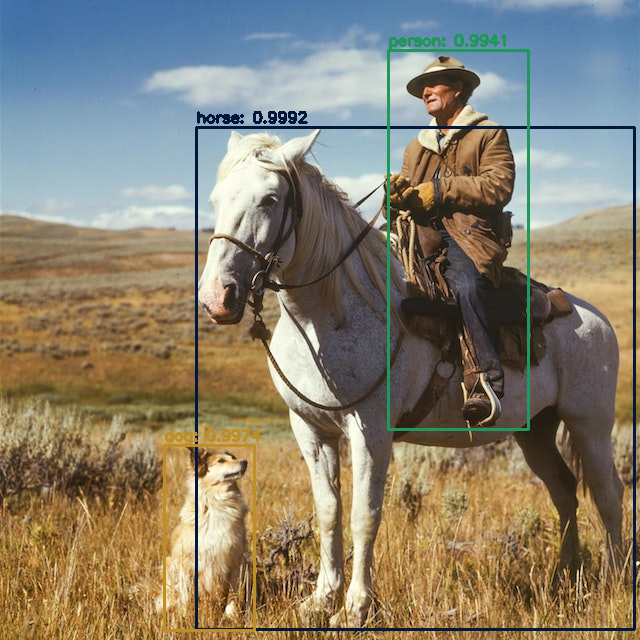

In [ ]:
output_img = draw_bounding_boxes(img, detector_output, BB_COLORS, LABELS)
cv2_imshow(output_img[0])

In [ ]:
!wget -qq http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz
!tar -zxvf faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz

faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/pipeline.config
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/saved_model.pb
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/variables.index


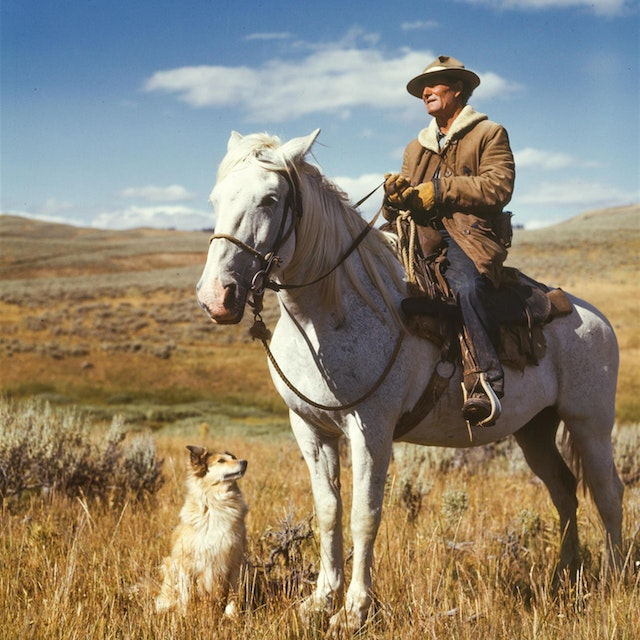

In [ ]:
img = cv2.imread("horse.jpg")
img= cv2.resize(img, dsize=(640, 640))
cv2_imshow(img)
img = np.expand_dims(img, 0)

In [ ]:
saved_model = tf.saved_model.load("/content/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model")
object_detector = hub.KerasLayer(saved_model)
model = create_model()

In [ ]:
start_time = time.time()
detector_output = model.predict(img)

print("Time required to predict: {0} seconds.".format(time.time() - start_time))

1/1 [==============================] - 4s 4s/step
Time required to predict: 4.024260759353638 seconds.


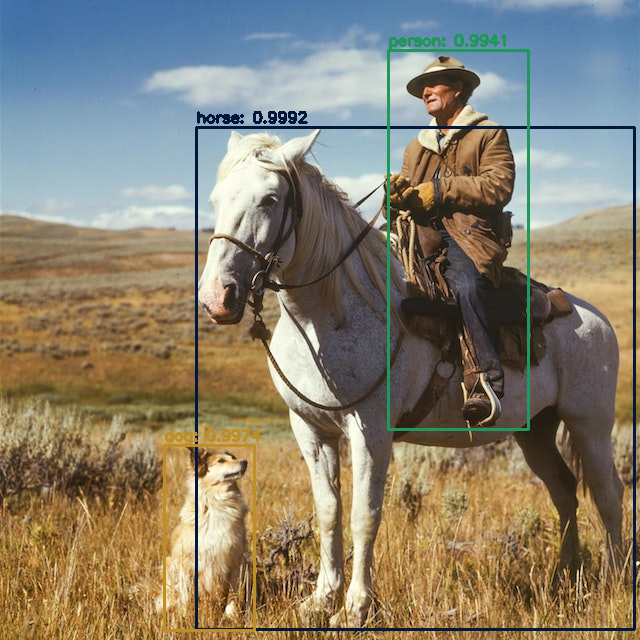

In [ ]:
output_img = draw_bounding_boxes(img, detector_output, BB_COLORS, LABELS)
cv2_imshow(output_img[0])

# YOLO

In [ ]:
!wget -qq https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget -qq https://pjreddie.com/media/files/yolov3.weights
!wget -qq https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

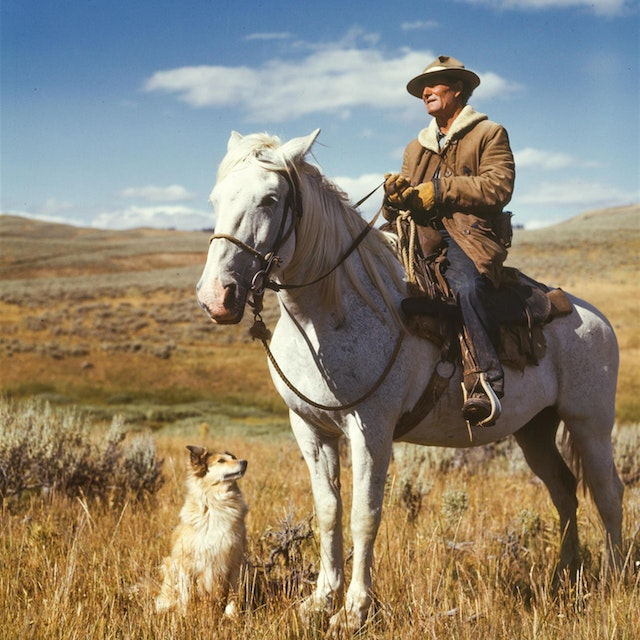

In [ ]:
img = cv2.imread("horse.jpg")
img= cv2.resize(img, dsize=(640, 640))
cv2_imshow(img)

In [ ]:
prep_img = img/255.0
prep_img = prep_img.transpose(2, 0, 1)
prep_img = np.expand_dims(prep_img, 0)
print(img.shape)
print(prep_img.shape)

(640, 640, 3)
(1, 3, 640, 640)


In [ ]:
model = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

In [ ]:
LABELS = list()
with open("/content/coco.names", "r") as file:
    for line in file:
        LABELS.append(line.strip())
#BB_COLORS = np.random.randint(0, 255, size=(len(LABELS), 3))

In [ ]:
len(LABELS)

80

In [ ]:
output_layers = model.getUnconnectedOutLayersNames()
output_layers

('yolo_82', 'yolo_94', 'yolo_106')

In [ ]:
output_layers = model.getUnconnectedOutLayersNames()
model.setInput(prep_img)
detector_outputs = model.forward(output_layers)

In [ ]:
print(len(detector_outputs))

for output in detector_outputs:
    print(output.shape)

3
(1200, 85)
(4800, 85)
(19200, 85)


In [ ]:
def get_bounding_boxes(detector_outputs):
		bounding_boxes = []
		confidences = []
		class_ids = []
		(H, W) = img.shape[:2]

		for output in detector_outputs:
				for detection in output:
						detection_scores = detection[5:]
						class_id = np.argmax(detection_scores)
						confidence = detection_scores[class_id]

						if confidence > 0.5:
								centerX, centerY, width, height = \
												np.array([detection[0]*W,
												  				detection[1]*H,
																	detection[2]*W,
																	detection[3]*H])

								x = round(centerX - (width / 2))
								y = round(centerY - (height / 2))
								bounding_boxes.append([x, y, round(width), round(height)])
								confidences.append(float(confidence))
								class_ids.append(class_id)

		return bounding_boxes, confidences, class_ids

bounding_boxes, confidences, class_ids = get_bounding_boxes(detector_outputs)

In [ ]:
indices = cv2.dnn.NMSBoxes(bounding_boxes, confidences, 0.5, 0.4)

In [ ]:
def draw_bounding_boxes_yolo(img, indices, bounding_boxes, confidences, class_ids, colors, labels):
		if len(indices) > 0:
				for i in indices.flatten():
						(x, y) = (bounding_boxes[i][0], bounding_boxes[i][1])
						(w, h) = (bounding_boxes[i][2], bounding_boxes[i][3])

						color = [int(c) for c in colors[class_ids[i]]]

						cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
						text = "{0}: {1:.4f}".format(labels[class_ids[i]], confidences[i])
						cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
		return img

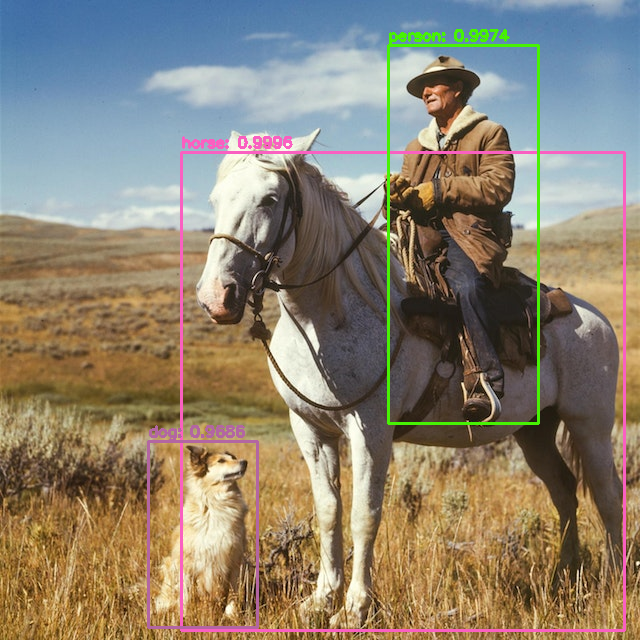

In [ ]:
output_img = draw_bounding_boxes_yolo(img, indices, bounding_boxes, confidences, class_ids, BB_COLORS, LABELS)
cv2_imshow(output_img)